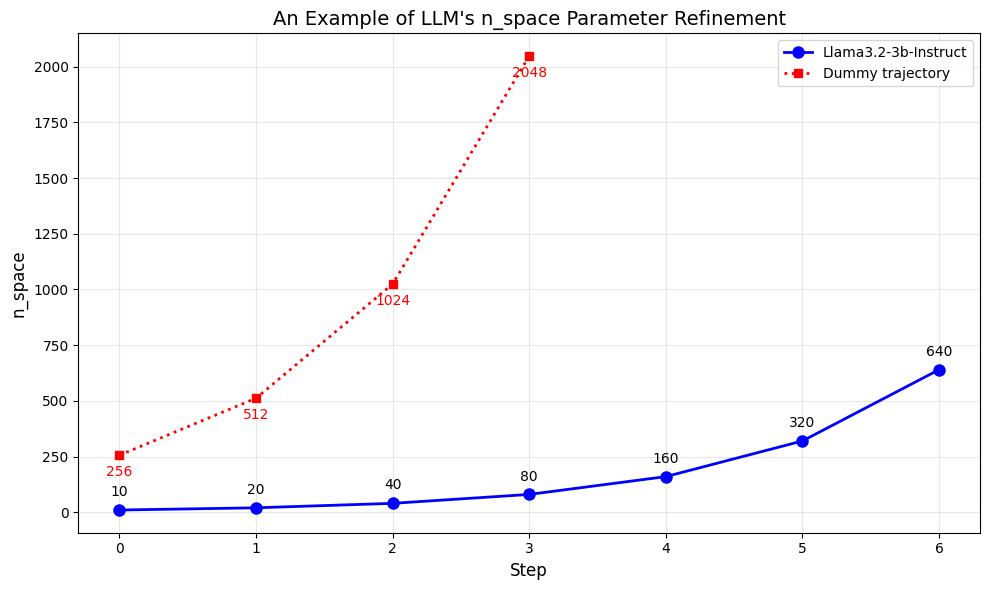

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_n_space_refinement(filename, qid, iterative_questions_path):
    """
    Plot the refinement of 'n_space' parameter against number of steps
    
    Args:
        filename: Path to the JSON progress file
        qid: QID to plot
        iterative_questions_path: Path to the iterative questions file containing dummy trajectories
    """
    # Load the JSON data
    with open(filename, 'r') as f:
        data = json.load(f)
    
    # Load the iterative questions data for dummy trajectory
    with open(iterative_questions_path, 'r') as f:
        iterative_data = json.load(f)
    
    # Find the result with the specified QID
    target_result = None
    for result in data['results']:
        if result['QID'] == qid:
            target_result = result
            break
    
    if target_result is None:
        print(f"QID {qid} not found in the data")
        return
    
    # Find the dummy trajectory for the specified QID
    dummy_trajectory = None
    for entry in iterative_data:
        if entry['QID'] == qid:
            dummy_trajectory = [param['n_space'] for param in entry['param_history']]
            break
    
    if dummy_trajectory is None:
        print(f"QID {qid} not found in iterative questions data")
        return
    
    # Extract n_space values from param_sequence
    n_space_values = []
    for param in target_result['param_sequence']:
        n_space_values.append(param['n_space'])
    
    # Create step numbers (0, 1, 2, ...)
    steps = list(range(len(n_space_values)))
    dummy_steps = list(range(len(dummy_trajectory)))
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(steps, n_space_values, 'bo-', linewidth=2, markersize=8, label=f'Llama3.2-3b-Instruct')
    plt.plot(dummy_steps, dummy_trajectory, 'r:', linewidth=2, markersize=6, marker='s', label='Dummy trajectory')
    
    plt.xlabel('Step', fontsize=12)
    plt.ylabel('n_space', fontsize=12)
    plt.title(f'An Example of LLM\'s n_space Parameter Refinement', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add value annotations on points
    for i, value in enumerate(n_space_values):
        plt.annotate(str(value), (i, value), textcoords="offset points", xytext=(0,10), ha='center')
    
    # Add value annotations on dummy trajectory points
    for i, value in enumerate(dummy_trajectory):
        plt.annotate(str(value), (i, value), textcoords="offset points", xytext=(0,-15), ha='center', color='red')
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_n_space_refinement('/home/ubuntu/dev/SimulCost-Bench/log_model_tool_call/euler_1d/medium/n_space/iterative_llama3.2_3b_base_progress.json', 
                       7, 
                       '/home/ubuntu/dev/SimulCost-Bench/data/euler_1d/n_space/medium/iterative_questions.json')